In [8]:
import matplotlib.pyplot as plt

Function: assuming linear battery voltage 

In [37]:
def battery_voltage(soc):
    min_voltage = 3.0  # Minimum voltage at 0% SoC
    max_voltage = 4.2  # Maximum voltage at 100% SoC
    return min_voltage + (max_voltage - min_voltage) * (soc / 100)

def pev1(soc, action, total_duration=4, timestep=0.25):
    max_power = 11  # kW
    battery_capacity = 60  # kWh
    charge_efficiency = 0.9
    discharge_efficiency = 0.95
    min_soc = 20
    max_soc = 80

    num_intervals = int(total_duration / timestep)
    soc_progress = [soc]
    power_progress = []
    energy_progress = [0]

    for _ in range(num_intervals):
        voltage = battery_voltage(soc)
        power = max_power * voltage / 4.2
        power_progress.append(power)

        if action == 1:  # Charging
            if soc < max_soc:
                added_energy = min(power * timestep, (max_soc - soc) / 100 * battery_capacity) * charge_efficiency
                soc += added_energy / battery_capacity * 100
                soc = min(soc, max_soc)
                energy_progress.append(energy_progress[-1] + added_energy)

        elif action == -1:  # Discharging
            if soc > min_soc:
                used_energy = min(power * timestep, (soc - min_soc) / 100 * battery_capacity) * discharge_efficiency
                soc -= used_energy / battery_capacity * 100
                soc = max(soc, min_soc)
                energy_progress.append(energy_progress[-1] + used_energy)

        elif action == 0:  
            pass 

        soc_progress.append(soc)

    return soc_progress, power_progress, energy_progress

State of Charge progress every 15 minutes for 3 hours charge: 50, 53.54, 57.11, 60.73, 64.39, 68.1, 71.85, 75.64, 79.48, 79.95, 79.99, 80.0, 80.0
Power progress every 15 minutes: 9.43, 9.54, 9.65, 9.77, 9.88, 10.0, 10.12, 10.23, 10.36, 10.37, 10.37, 10.37
Total energy exchanged progress every 15 minutes: 0, 2.12, 4.27, 6.44, 8.64, 10.86, 13.11, 15.39, 17.69, 17.97, 18.0, 18.0, 18.0
Power at the end of the period: 10.37 kW
Total energy consumed/generated: 18.00 kWh


Text(0.5, 1.0, 'State of Charge Progress over Time')

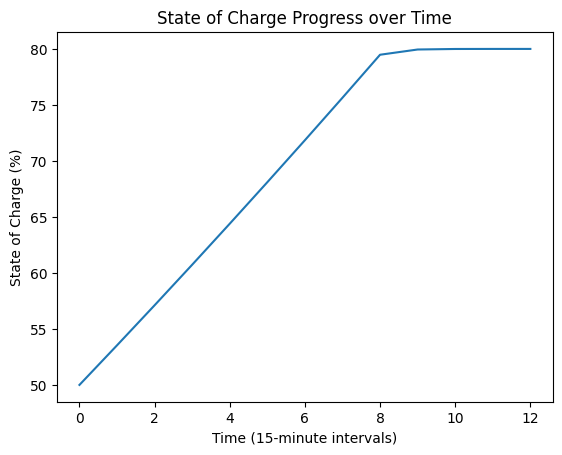

In [45]:
initial_soc = 50  # Initial State of Charge in %
action = 1  # Action: 1 for charging, -1 for discharging, 0 for nothing
total_duration = 3  # hours

soc_progress, power_progress, energy_progress = pev1(initial_soc, action, total_duration)
print(f"State of Charge progress every 15 minutes for {total_duration} hours charge: {', '.join([str(round(soc, 2)) for soc in soc_progress])}")
print(f"Power progress every 15 minutes: {', '.join([str(round(power, 2)) for power in power_progress])}")
print(f"Total energy exchanged progress every 15 minutes: {', '.join([str(round(energy, 2)) for energy in energy_progress])}")


print(f"Power at the end of the period: {power_progress[-1]:.2f} kW")
print(f"Total energy consumed/generated: {energy_progress[-1]:.2f} kWh")


plt.plot(soc_progress)
plt.ylabel("State of Charge (%)")
plt.xlabel("Time (15-minute intervals)")
plt.title("State of Charge Progress over Time")
